In [1]:
import json

In [1]:
def read_json(json_file: str):
    """Read JSON data from a file.

    Args:
        json_file (str): The path to the JSON file.

    Returns:
        List[Dict]: A list of dictionaries containing the JSON data.
    """
    with open(json_file, 'r') as file:
        data = json.load(file)
    return data

In [157]:
matbench_dielectric = "/home/so87pot/n0w0f/structllm/data/mb_3_head/matbench_dielectric_396_all.json.gz"
matbench_log_gvrh = "/home/so87pot/n0w0f/structllm/data/mb_3_head/matbench_log_gvrh_27_all.json.gz"
matbench_log_kvrh = "/home/so87pot/n0w0f/structllm/data/mb_3_head/matbench_log_kvrh_27_all.json.gz"
matbench_perovskites = "/home/so87pot/n0w0f/structllm/data/mb_3_head/matbench_perovskites_27_all.json.gz"
matbench_mp_gap = "/home/so87pot/n0w0f/structllm/data/mb_3_head/matbench_mp_gap_27_all.json.gz"

In [1]:
path = "/home/so87pot/n0w0f/structllm/data/05_02_300k_ft_perov_512_atom/matbench_perovskites_05_02.json.gz"


In [3]:
from matbench.bench import MatbenchBenchmark
mb = MatbenchBenchmark(autoload=False)
mp_perov = mb.matbench_perovskites
mp_perov.load()


2024-02-05 15:06:52 INFO     Initialized benchmark 'matbench_v0.1' with 13 tasks: 
['matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels']
2024-02-05 15:06:52 INFO     Loading dataset 'matbench_perovskites'...
2024-02-05 15:06:56 INFO     Dataset 'matbench_perovskites loaded.


In [4]:
mb = mp_perov.from_file(path)

In [5]:
mb.is_recorded

{0: True, 1: True, 2: True, 3: True, 4: True}

In [6]:
mb.scores

{'mae': {'mean': 0.16644155941452432,
  'max': 0.1772300928629191,
  'min': 0.14858475348288835,
  'std': 0.010684631458913182},
 'rmse': {'mean': 0.268047299297259,
  'max': 0.290583293407963,
  'min': 0.22729906434739394,
  'std': 0.02325147872669033},
 'mape': {'mean': 0.1411908981518503,
  'max': 0.15511820564297807,
  'min': 0.12633744623132578,
  'std': 0.011076355054653132},
 'max_error': {'mean': 2.0629446506500244,
  'max': 2.698207674026489,
  'min': 1.3459299659729007,
  'std': 0.46622679670777695},
 '_ipython_canary_method_should_not_exist_': {}}

In [ ]:
{'mae': {'mean': 0.16321307585557826,
  'max': 0.1723565420311592,
  'min': 0.15192530561065348,
  'std': 0.007781953169715383},
 'rmse': {'mean': 0.2641490023436838,
  'max': 0.28574643983233655,
  'min': 0.23594510806889693,
  'std': 0.019406397274813476},
 'mape': {'mean': 0.13135148485477674,
  'max': 0.1402066548614776,
  'min': 0.12425420862655222,
  'std': 0.005510391218068342},
 'max_error': {'mean': 1.6451882826089856,
  'max': 1.794321937561035,
  'min': 1.4390246963500974,
  'std': 0.15202900006628944},
 '_ipython_canary_method_should_not_exist_': {}}

In [ ]:
{'mae': {'mean': 0.17484675448866333,
  'max': 0.18238587781335278,
  'min': 0.16562290710247254,
  'std': 0.006226021312469289},
 'rmse': {'mean': 0.27217689887293506,
  'max': 0.2831111064052118,
  'min': 0.26151922172722697,
  'std': 0.007002984927760817},
 'mape': {'mean': 0.14866457864496097,
  'max': 0.15834095181279684,
  'min': 0.13662218439557322,
  'std': 0.008421444175851443},
 'max_error': {'mean': 1.6297150650024412,
  'max': 1.8278116989135746,
  'min': 1.3613506603240966,
  'std': 0.157011092399824},
 '_ipython_canary_method_should_not_exist_': {}}

In [ ]:

{'mae': {'mean': 0.08704868994910075,
  'max': 0.09027901291758213,
  'min': 0.08408947054242642,
  'std': 0.0025914525310754355},
 'rmse': {'mean': 0.14142302810722765,
  'max': 0.14564940650735386,
  'min': 0.1355296844938767,
  'std': 0.0035328008374250174},
 'mape': {'mean': 0.05570973611811605,
  'max': 0.060850154745087995,
  'min': 0.052376917805488254,
  'std': 0.0031169970301448894},
 'max_error': {'mean': 1.4545736836390915,
  'max': 1.8592499494552612,
  'min': 1.1089501822153522,
  'std': 0.2552881260330971},
 '_ipython_canary_method_should_not_exist_': {}}

In [ ]:
{'mae': {'mean': 0.08665556902551864,
  'max': 0.0879845488474837,
  'min': 0.08488214832819575,
  'std': 0.0010367499681410697},
 'rmse': {'mean': 0.15155514536300393,
  'max': 0.15645323563382216,
  'min': 0.14811551621619845,
  'std': 0.0030758718730574514},
 'mape': {'mean': 0.05706560324799713,
  'max': 0.06061106047082557,
  'min': 0.05444826649676831,
  'std': 0.0022678333416675726},
 'max_error': {'mean': 1.4821990951559088,
  'max': 1.7518041133880615,
  'min': 1.1541506493250324,
  'std': 0.2558396600838983},
 '_ipython_canary_method_should_not_exist_': {}}

In [ ]:
{'mae': {'mean': 0.08872087944347276,
  'max': 0.09003899941981135,
  'min': 0.08682511130656775,
  'std': 0.0011370670044335794},
 'rmse': {'mean': 0.15158522962175147,
  'max': 0.1551538747784559,
  'min': 0.14680000074519003,
  'std': 0.0027504823258621153},
 'mape': {'mean': 0.057205990728936694,
  'max': 0.06057298854339561,
  'min': 0.054650286528915654,
  'std': 0.0021682805498218862},
 'max_error': {'mean': 1.3762344588071813,
  'max': 1.7782129049301147,
  'min': 1.1327246868769123,
  'std': 0.22047075450939516},
 '_ipython_canary_method_should_not_exist_': {}}

In [ ]:
{'mae': {'mean': 0.08627010090170432,
  'max': 0.08788658787419694,
  'min': 0.08395192564192809,
  'std': 0.001308807620313251},
 'rmse': {'mean': 0.14925238148758083,
  'max': 0.15375920237814758,
  'min': 0.14506786312280193,
  'std': 0.002870745398897964},
 'mape': {'mean': 0.056416144097510855,
  'max': 0.05996457576482949,
  'min': 0.05364092728215225,
  'std': 0.002070197771924443},
 'max_error': {'mean': 1.445230393310112,
  'max': 1.7754493951797485,
  'min': 1.1095647061029865,
  'std': 0.261163043879438},
 '_ipython_canary_method_should_not_exist_': {}}

In [ ]:
{'mae': {'mean': 0.9029617352207924,
  'max': 0.9218828208777203,
  'min': 0.8835956506026782,
  'std': 0.01522897490543334},
 'rmse': {'mean': 1.0882545900466405,
  'max': 1.1066540978498651,
  'min': 1.0609659041576418,
  'std': 0.01709733530196532},
 'mape': {'mean': 1.28571758736317,
  'max': 1.3372490864324655,
  'min': 1.195482810167359,
  'std': 0.05604625131083189},
 'max_error': {'mean': 3.621107353687287,
  'max': 3.891853258609772,
  'min': 3.4569366979599003,
  'std': 0.15334349782225742},
 '_ipython_canary_method_should_not_exist_': {}}

In [43]:
matbench_dielectric = "/home/so87pot/n0w0f/structllm/data/comp_2m/matbench_dielectric.json.gz"
matbench_log_gvrh = "/home/so87pot/n0w0f/structllm/data/comp_2m/matbench_log_gvrh.json.gz"
matbench_log_kvrh = "/home/so87pot/n0w0f/structllm/data/comp_2m/matbench_log_kvrh.json.gz"
matbench_perovskites = "/home/so87pot/n0w0f/structllm/data/comp_2m/matbench_perovskites.json.gz"


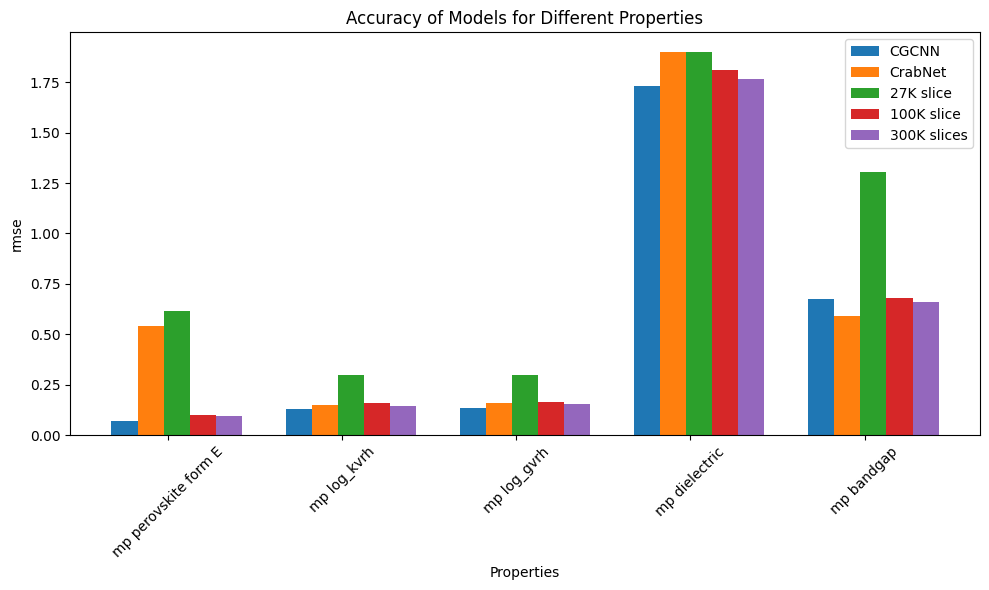

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
properties = ['mp perovskite form E', 'mp log_kvrh', 'mp log_gvrh', 'mp dielectric', 'mp bandgap']
models = ['CGCNN', 'CrabNet', '27K slice', '100K slice', '300K slices']
accuracy = [
    [0.0722, 0.5412, 0.614, 0.1016, 0.095],
    [0.1301, 0.1471, 0.296, 0.15726, 0.1453],
    [0.1337, 0.1604, 0.298, 0.165, 0.153],
    [1.7288, 1.8976, 1.902, 1.81, 1.766],
    [0.6771, 0.5898, 1.304, 0.6821, 0.662]
]

# Convert data to np array
accuracy_np = np.array(accuracy)

# Plotting
x = np.arange(len(properties))
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(models)):
    ax.bar(x + i * width, accuracy_np[:, i], width, label=models[i])

ax.set_xlabel('Properties')
ax.set_ylabel('rmse')
ax.set_title('Accuracy of Models for Different Properties')
ax.set_xticks(x + 0.25)
ax.set_xticklabels(properties)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Save plot as PNG
plt.savefig('/home/so87pot/n0w0f/structllm/data/mb_3_head/accuracy_comparison.png')

plt.show()
